In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import aplpy
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.seterr(all='ignore')

sns.set(style='ticks', 
        rc={'font.family'          : 'serif',
            'text.usetex'          : True,
            'axes.axisbelow'       : True,
            'mathtext.fontset'     : 'cm',
            'mathtext.default'     : 'regular',
            'xtick.direction'      : 'in',
            'ytick.direction'      : 'in',
       })

pal = sns.color_palette('colorblind')
dark = sns.color_palette('dark')
sns.set_palette(pal)

In [2]:
df = pd.read_csv('../header_info.csv', index_col=0)

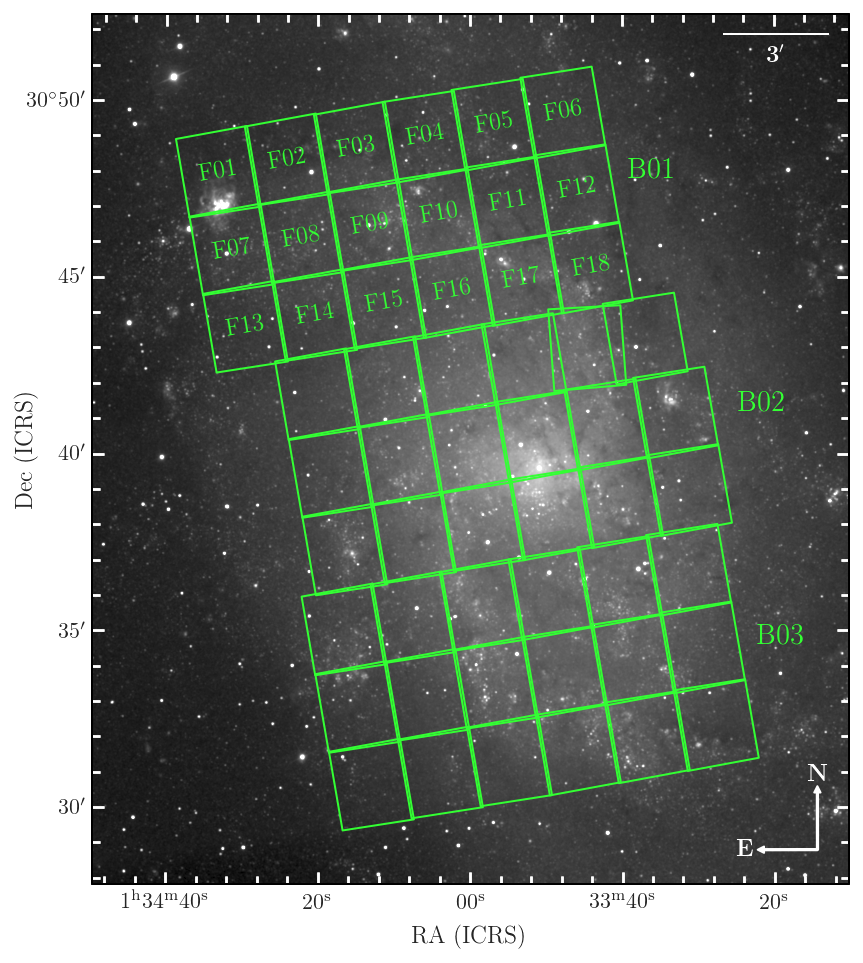

In [3]:
def add_tweaks(fig):
    aplpy.AxisLabels(fig).set_ypad(0)
    fig.show_arrows([23.31, 23.31], [30.48, 30.48], [0., 0.0327], [0.0299, 0.],
                    length_includes_head=True, layer='arrows', color='w', edgecolor='w')
    fig.add_label(23.31, 30.515, '${\mathbf{N}}$', color='w')
    fig.add_label(23.35, 30.48, '${\mathbf{E}}$', color='w')
    fig.add_scalebar(3/60, label='$\mathbf{3^{\prime}}$', color='w', corner='top right')

df_f110w = df.query('FILT_DET == "IR-F110W"')
b01_f110W = df_f110w.query('BRICK == "B01"')
ra = df_f110w.filter(regex='^RA[0-3]')
dec = df_f110w.filter(regex='^DEC[0-3]')
footprints = np.dstack([ra, dec])
labels = b01_f110W[['RAC', 'DECC', 'FIELD']]

fig = aplpy.FITSFigure('data/M33_SDSS9_r.fits', figsize=(7.2,8))
fig.show_grayscale(stretch='sqrt', interpolation='bicubic',
                   vmin=0.01, vmax=3.9)
fig.show_polygons(list(footprints), layer='footprints', edgecolor='#33ff33', linewidth=1)
for _, row in labels.iterrows():
    fig.add_label(row.RAC, row.DECC, row.FIELD, color='#33ff33', rotation=10)
fig.add_label(23.40, 30.80, 'B01', color='#33ff33', fontsize='large')
fig.add_label(23.34, 30.69, 'B02', color='#33ff33', fontsize='large')
fig.add_label(23.33, 30.58, 'B03', color='#33ff33', fontsize='large')
add_tweaks(fig)
plt.savefig('figures/IR_footprints.pdf', dpi=150, bbox_inches='tight')

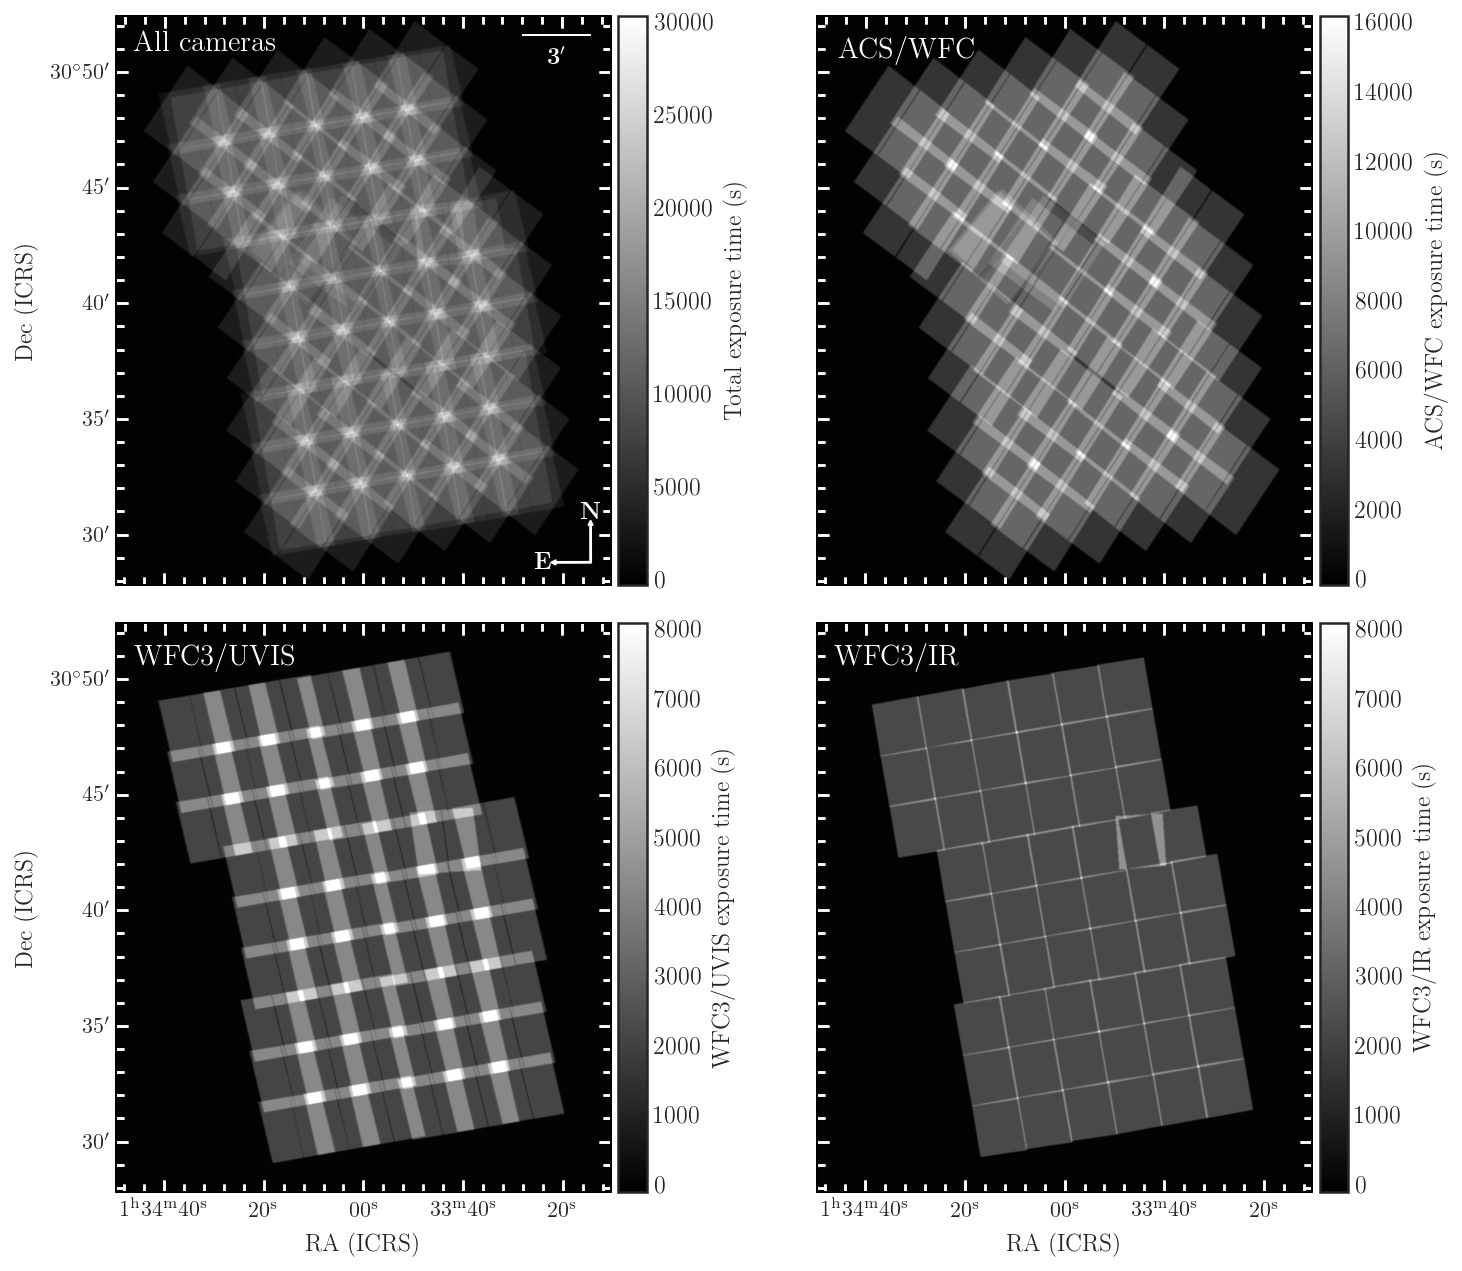

In [7]:
fig = plt.figure(figsize=(10, 9))
f0 = aplpy.FITSFigure('data/exposure_map_all_small.fits', figure=fig, subplot=(2,2,1))
f1 = aplpy.FITSFigure('data/exposure_map_WFC_small.fits', figure=fig, subplot=(2,2,2))
f2 = aplpy.FITSFigure('data/exposure_map_UVIS_small.fits', figure=fig, subplot=(2,2,3))
f3 = aplpy.FITSFigure('data/exposure_map_IR_small.fits', figure=fig, subplot=(2,2,4))

f0.show_grayscale(vmin=-250, vmax=30350, interpolation='bicubic')
f1.show_grayscale(vmin=-150, vmax=16200, interpolation='bicubic')
f2.show_grayscale(vmin=-100, vmax=8100, interpolation='bicubic')
f3.show_grayscale(vmin=-100, vmax=8100, interpolation='bicubic')
add_tweaks(f0)

for f in [f0, f1, f2, f3]:
    f.add_colorbar()
f0.colorbar.set_axis_label_text('Total exposure time (s)')
f1.colorbar.set_axis_label_text('ACS/WFC exposure time (s)')
f2.colorbar.set_axis_label_text('WFC3/UVIS exposure time (s)')
f3.colorbar.set_axis_label_text('WFC3/IR exposure time (s)')

aplpy.AxisLabels(f0).hide_x()
aplpy.TickLabels(f0).hide_x()
aplpy.AxisLabels(f1).hide()
aplpy.TickLabels(f1).hide()

fig.tight_layout()
f0.add_label(0.18, 0.95, 'All cameras', relative=True, color='w', layer='text', fontsize='large')
f1.add_label(0.18, 0.94, 'ACS/WFC', relative=True, color='w', layer='text', fontsize='large')
f2.add_label(0.2, 0.94, 'WFC3/UVIS', relative=True, color='w', layer='text', fontsize='large')
f3.add_label(0.16, 0.94, 'WFC3/IR', relative=True, color='w', layer='text', fontsize='large')

aplpy.AxisLabels(f3).hide_y()
aplpy.TickLabels(f3).hide_y()

plt.savefig('figures/total_exptimes.pdf', dpi=300, bbox_inches='tight')

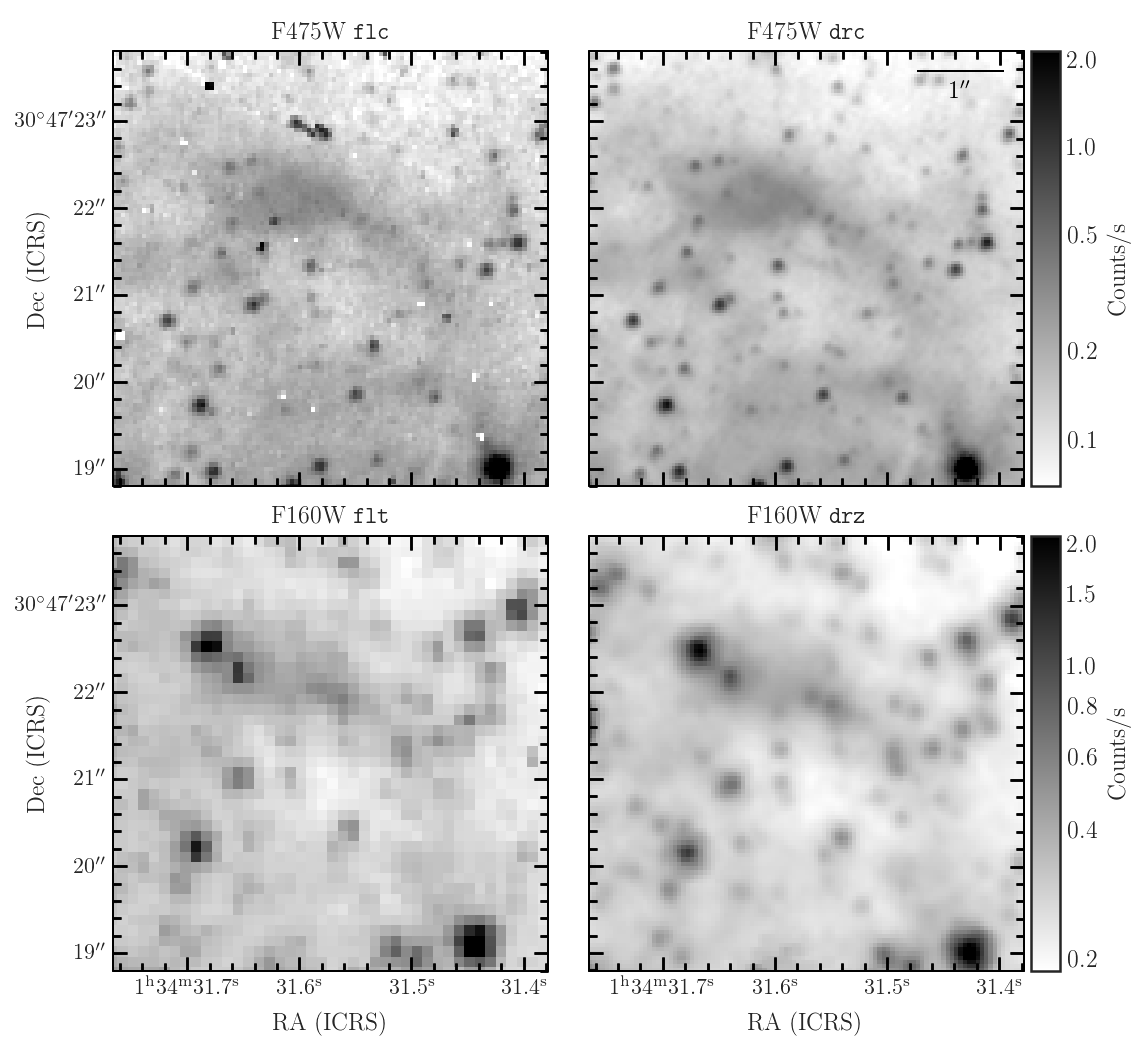

In [111]:
fig = plt.figure(figsize=(8.6, 7.2))

f0 = aplpy.FITSFigure('data/cutouts/F475W_flc_cutout.fits',
                      north=True, figure=fig, subplot=(2, 2, 1))
f1 = aplpy.FITSFigure('data/cutouts/F475W_drc_cutout.fits',
                      north=True, figure=fig, subplot=(2, 2, 2))
f2 = aplpy.FITSFigure('data/cutouts/F160W_flt_cutout.fits',
                      north=True, figure=fig, subplot=(2, 2, 3))
f3 = aplpy.FITSFigure('data/cutouts/F160W_drz_cutout.fits',
                      north=True, figure=fig, subplot=(2, 2, 4))

for f in [f0, f1, f2, f3]:
    f.set_theme('publication')
    f.recenter(23.63155, 30.78925, radius=2.5/3600)

min_opt, max_opt = 0.07, 2.15
min_ir, max_ir = 0.189, 2.1
f0.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f1.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f2.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)
f3.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)

f0.set_title(r'F475W $\mathrm{\tt{flc}}$')
f1.set_title(r'F475W $\mathrm{\tt{drc}}$')
f2.set_title(r'F160W $\mathrm{\tt{flt}}$')
f3.set_title(r'F160W $\mathrm{\tt{drz}}$')

f1.add_colorbar()
f3.add_colorbar()
f1.colorbar.set_axis_label_text('Counts/s')
f3.colorbar.set_axis_label_text('Counts/s')
f1.colorbar.set_ticks([0.1, 0.2, 0.5, 1, 2])
f3.colorbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1, 1.5, 2])
f1.add_scalebar(1/3600, label='$1^{\prime \prime}$', corner='top right')

axlabels_f0 = aplpy.AxisLabels(f0)
axlabels_f1 = aplpy.AxisLabels(f1)
axlabels_f2 = aplpy.AxisLabels(f2)
axlabels_f3 = aplpy.AxisLabels(f3)
ticklabels_f0 = aplpy.TickLabels(f0)
ticklabels_f1 = aplpy.TickLabels(f1)
ticklabels_f2 = aplpy.TickLabels(f2)
ticklabels_f3 = aplpy.TickLabels(f3)

axlabels_f0.hide_x()
ticklabels_f0.hide_x()
axlabels_f1.hide()
ticklabels_f1.hide()
axlabels_f3.hide_y()
ticklabels_f3.hide_y()
axlabels_f0.set_ypad(-1)
axlabels_f2.set_ypad(-1)

fig.tight_layout(w_pad=0.5, h_pad=2, rect=[0, 0, 1, 1])

# something in aplpy or matplotlib or astropy started cutting off the titles
# here is my disgraceful solution
ax_fake = fig.add_axes(rect=[0.25, 0.99, 0.5, 0.02], frame_on=False, facecolor=(0,0,0,0),
                       xticks=[], yticks=[])

fig.savefig('figures/4panel_img.pdf', dpi=300, bbox_inches='tight')